# 朴素贝叶斯垃圾邮件识别
---
## 一.案例介绍
电子邮件是互联网的一项重要服务，在大家的学习、工作和生活中会广泛使用。但是大家的邮箱常常被各种各样的垃圾邮件填充了。有统计显示，每天互联网上产生的垃圾邮件有几百亿近千亿的量级。  
因此，对电子邮件服务提供商来说，垃圾邮件过滤是一项重要功能。而朴素贝叶斯算法在垃圾邮件识别任务上一直表现非常好，至今仍然有很多系统在使用朴素贝叶斯算法作为基本的垃圾邮件识别算法。

本次实验数据集来自[Trec06](https://plg.uwaterloo.ca/cgi-bin/cgiwrap/gvcormac/foo06)的中文垃圾邮件数据集，目录解压后包含三个文件夹，其中data目录下是所有的邮件（未分词），已分词好的邮件在data_cut目录下。  
邮件分为邮件头部分和正文部分，两部分之间一般有空行隔开。标签数据在label文件夹下，文件中每行是标签和对应的邮件路径。‘spam’表示垃圾邮件，‘ham’表示正常邮件。


In [17]:
import os
import jieba
import re
import random

## 二.邮件正文文本特征以及标签提取

- **小规模数据集**："./trec06c-utf8/data/000/"📂路径下 ***300*** 条邮件📧

In [18]:
data_list=[] # 邮件文本特征列表（二维列表）
files_path="./trec06c-utf8/data/000/"
file_list=os.listdir(files_path)
for file in file_list:
    file_path=os.path.join(files_path,file)
    with open(file_path,'r',encoding='utf-8') as f:
        # 忽略邮件头信息（邮件头与邮件正文之间有空行）
        while 1:
            head=f.readline()
            if head=='\n':
                break
        text=f.read()
        # 提取文字（only）
        pre=re.compile(u'[\u4e00-\u9fa5]')
        text=re.findall(pre, text)
        text=''.join(text)
        # jieba分词
        wordcut=jieba.cut(text,cut_all=False)
        wordlist=list(wordcut)
        
        data_list.append(wordlist)
# 显示第一封邮件的文本特征以及导入邮件数量
print(data_list[0])
print(len(data_list))

['课程', '背景', '每', '一位', '管理', '和', '技术人员', '都', '清楚', '地', '懂得', '单纯', '从', '技术', '角度', '衡量', '为', '合算', '的', '方案', '也许', '却是', '一个', '财务', '陷阱', '表面', '赢利', '而', '暗地里', '亏损', '使', '经营者', '无法', '接受', '如何', '将', '技术手段', '与', '财务', '运作', '相结合', '使', '每位', '管理', '和', '技术人员', '都', '从', '本', '课程', '通过', '沙盘', '模拟', '和', '案例', '分析', '使', '企业', '各级', '管理', '和', '技术人员', '掌握', '财务管理', '知识', '利用', '财务', '信息', '改进', '管理决策', '实现', '管理', '效益', '最大化', '通过', '学习', '本', '课程', '您', '将', '对', '会计', '与', '财务管理', '有', '基本', '了解', '提高', '日常', '管理', '活动', '的', '财务', '可行性', '通过', '分析', '关键', '业绩', '指标', '形成', '战略规划', '与', '全面', '预算', '突出', '企业', '管理', '的', '重心', '形成', '管理', '的', '系统性', '课程', '大纲', '一', '财务', '工作', '内容', '及', '作用', '财务', '专家', '的', '思维', '模式', '财务', '工作', '的', '基本', '内容', '管理者', '如何', '利用', '财务', '进行', '管理', '和', '决策', '二', '如何', '阅读', '和', '分析', '财务报表', '会计报表', '的', '构成', '损益表', '的', '阅读', '与', '分析', '资产', '负债表', '的', '阅读', '与', '分析', '资金', '流量', '和', '现金流量', '表', '的', '阅读', '与', '分析', '会计报表

In [19]:
label_list=[] # 邮件标签列表
label_path="./trec06c-utf8/label/index"
with open(label_path,'r',encoding='utf-8') as f:
    for i in range(len(file_list)):
        label=f.readline()
        if "spam" in label:
            label_list.append(1)
        else:
            label_list.append(0)
    f.close()
# 显示标签 1：spam，0：ham
print(label_list)
print(len(label_list))

[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
300


## 三.划分训练集和测试集

- 训练集 : 测试集（***8:2***）✂️

In [20]:
# 划分训练测试集8:2
data_class_list = list(zip(data_list, label_list)) 
random.shuffle(data_class_list)
index = int(len(data_class_list) * 0.2) + 1
train_list = data_class_list[index:]
test_list = data_class_list[:index]
train_data_list, train_class_list = zip(*train_list)
test_data_list, test_class_list = zip(*test_list)

## 四.特征选择（词表构建）

In [21]:
# 将所有特征汇总计数排序
all_words_dict = {}
for word_list in train_data_list:
        for word in word_list:
            if word in all_words_dict.keys():
                all_words_dict[word] += 1
            else:
                all_words_dict[word] = 1
#根据键的值倒序排序             
all_words_tuple_list = sorted(all_words_dict.items(), key = lambda f:f[1], reverse = True)
all_words_list, all_words_nums = zip(*all_words_tuple_list)
all_words_list = list(all_words_list)

In [22]:
# 导入word.text（包含的词对分类没有太大的影响，需要在构建词表时去除）
words_set = set()
with open("./word.txt", 'r', encoding = 'utf-8') as f:
    for line in f.readlines():
        word = line.strip()  
        if len(word) > 0:
            words_set.add(word)
print(words_set)

{'多么', '继而', '非但', '每当', '到', '出来', '已', '的', '如是', '那个', '本身', '不管', '距', '她', '其中', '那些', '此外', '该', '此处', '其它', '本人', '向', '这', '去', '下', '分别', '是', '值此', '所在', '各位', '逐步', '亦', '同时', '我们', '有的', '向着', '怎么', '自己', '后者', '许多', '对比', '来说', '以免', '如', '不过', '别', '此时', '就是', '其次', '根据', '又', '既是', '赖以', '儿', '彼时', '此间', '呵呵', '别人', '以至', '如同下', '既往', '既然', '或者', '既', '嘻嘻', '另', '似的', '固然', '说来', '如何', '嘿嘿', '拿', '吧', '些', '所以', '另一方面', '多少', '这个', '与其', '不至于', '可以', '此地', '当地', '后', '再', '有', '那儿', '尽管如此', '由', '与否', '沿着', '其他', '据', '尔', '对方', '趁', '你', '且', '然而', '这边', '无论', '于', '彼此', '人们', '的话', '哪些', '别的', '哪', '诸位', '曾', '若是', '全体', '有时', '不外乎', '他们', '他', '正巧', '若', '谁人', '各自', '万一', '一切', '嘛', '因此', '正是', '但', '人', '否则', '怎么样', '如若', '不单', '这里', '毋宁', '然后', '致', '自从', '截至', '无', '怎么办', '只消', '甚至', '为什么', '自身', '因而', '同', '反而', '开外', '只', '有些', '打', '另外', '前者', '只是', '小', '得', '几', '直到', '上', '或是', '让', '某个', '为', '如此', '要么', '可是', '啦', '果然', '之所以', '倘若', '随着', '经过', '并且', '譬如', 

In [23]:
'''
函数说明：构建词表
Parameters:
    all_words_list - 所有词汇表（根据出现次数从大到小排列）
    feature_num - 特征数量
    words_set - 去除词汇表
Returns:
    feature_words - 词表（用于构建模型）
'''
def words_dict(all_words_list, feature_num, words_set = set()):
    feature_words = []
    n = 1
    for t in range(len(all_words_list)):
        if n > feature_num:
            break                               
        if all_words_list[t] not in words_set and 1 < len(all_words_list[t]) < 5:
            feature_words.append(all_words_list[t])
        n += 1   
    return feature_words

In [24]:
'''
函数说明：文本特征向量化
Parameters:
    train_data_list - 训练集
    test_data_list - 测试集
    feature_words - 词表
Returns:
    train_feature_list - 训练集文本特征向量
    test_feature_list - 测试集文本特征向量
'''
def TextFeatures(train_data_list, test_data_list, feature_words):
    def text_features(text, feature_words):                                          
        text_words = set(text)
        features = [1 if word in text_words else 0 for word in feature_words]
        return features
    train_feature_list = [text_features(text, feature_words) for text in train_data_list]
    test_feature_list = [text_features(text, feature_words) for text in test_data_list]
    return train_feature_list, test_feature_list 

## 五.模型构建

🧰***sklearn*** 实现，***MultinomialNB*** ：先验为多项式分布的朴素贝叶斯

- alpha：浮点型可选参数，默认为1.0，其实就是添加拉普拉斯平滑，即为上述公式中的λ ，如果这个参数设置为0，就是不添加平滑；
- fit_prior：布尔型可选参数，默认为True。布尔参数fit_prior表示是否要考虑先验概率，如果是false, 则所有的样本类别输出都有相同的类别先验概率。  
  否则可以自己用第三个参数class_prior输入先验概率，或者不输入第三个参数class_prior让MultinomialNB自己从训练集样本来计算先验概率，此时的先验概率为  
  $P(V=v_j)=m_j/m$  
  其中 $m$ 为训练集样本总数量，$m_j$ 为输出为第k类别的训练集样本数；
- class_prior：可选参数，默认为None；


In [25]:
from sklearn.naive_bayes import MultinomialNB
'''
函数说明：贝叶斯模型
Parameters:
    train_data_list - 训练集特征
    test_data_list - 测试集特征
    train_class_list - 训练标签
Returns:
    predict_class_list - 预测标签
'''
def NBclassifier(train_feature_list,test_feature_list,train_class_list):
    classifier = MultinomialNB().fit(train_feature_list, train_class_list)
    predict_class_list=classifier.predict(test_feature_list)
    return predict_class_list

## 六.对比特征数目（词表大小）对模型效果的影响

测试特征数目从500到1500对模型效果的影响：

- 📐分别画出了feature_num对以下指标的影响趋势  
  准确率 ***Accuracy***
  精准率 ***Precision***
  召回率 ***Recall***

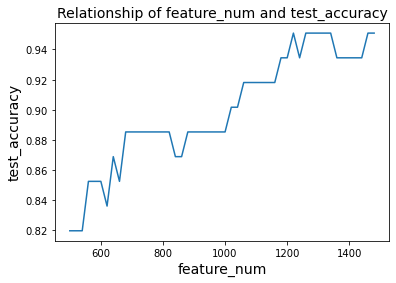

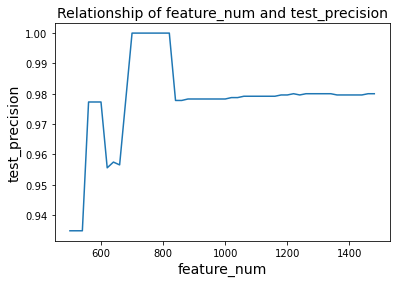

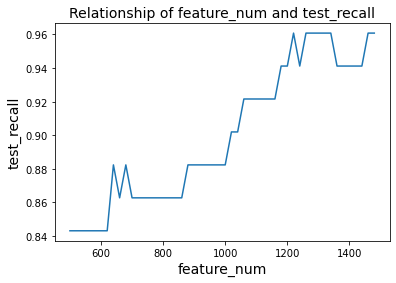

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

acc_list = []
prec_list = []
rec_list = []

feature_num_list = range(500, 1500, 20)
for feature_num in feature_num_list:
    feature_words = words_dict(all_words_list, feature_num, words_set)
    train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
    predict_class_list = NBclassifier(train_feature_list, test_feature_list, train_class_list)
    
    acc_list.append(accuracy_score(test_class_list,predict_class_list))
    prec_list.append(precision_score(test_class_list,predict_class_list))
    rec_list.append(recall_score(test_class_list,predict_class_list))
    
plt.figure()
plt.plot(feature_num_list, acc_list)
plt.title('Relationship of feature_num and test_accuracy',fontsize=14)
plt.xlabel('feature_num',fontsize=14)
plt.ylabel('test_accuracy',fontsize=14)
plt.show()

plt.figure()
plt.plot(feature_num_list, prec_list)
plt.title('Relationship of feature_num and test_precision',fontsize=14)
plt.xlabel('feature_num',fontsize=14)
plt.ylabel('test_precision',fontsize=14)
plt.show()

plt.figure()
plt.plot(feature_num_list, rec_list)
plt.title('Relationship of feature_num and test_recall',fontsize=14)
plt.xlabel('feature_num',fontsize=14)
plt.ylabel('test_recall',fontsize=14)
plt.show()

## 七.测试集分类结果分析

- 选取1250个特征构建词表训练模型💯  
准确率 ***Accuracy***、精准率 ***Precision***、召回率 ***Recall***均超过 ***90%***

In [29]:
feature_words = words_dict(all_words_list, 1250, words_set)
print("词表(数量1250):\n",feature_words)
train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
predict_class_list=NBclassifier(train_feature_list,test_feature_list,train_class_list)

print("准确率：",accuracy_score(test_class_list,predict_class_list))
print("精确率：",precision_score(test_class_list,predict_class_list))
print("召回率：",recall_score(test_class_list,predict_class_list))

词表(数量1250):
 ['管理', '公司', '企业', '发票', '合作', '物流', '信息', '代理', '生产', '服务', '优惠', '有限公司', '网站', '广告', '我司', '提供', '联系人', '每月', '左右', '设计', '发展', '中国', '产品', '实业', '代开', '您好', '财务', '分析', '流程', '软件', '深圳市', '免费', '电脑', '咨询', '朋友', '一个', '增值税', '点数', '需要', '运输', '负责人', '进项', '经理', '贵司', '业务', '工作', '发布', '电话', '一次', '完成', '供应商', '直接', '良好', '部分', '承诺', '方面', '课程', '地税', '点击', '邮箱', '专业', '商祺', '邮件', '机会', '上网', '社会关系', '郑重', '欢迎', '顺祝', '进行', '采购', '抵扣', '有着', '不了', '销售额', '实力雄厚', '所用', '小时', '国税', '进一步', '分公司', '技术', '图片', '网络', '宣传', '详情请', '大小', '费用', '付款', '使用', '数量', '绝对', '希望', '中心', '洽商', '税务局', '永久', '客户', '来电', '问题', '较多现', '活动', '支持', '连锁', '长期有效', '深圳', '联系', '真票', '结构', '家电', '系统', '额度', '方法', '放大', '注册', '北京', '时间', '疑虑', '担心', '方案', '组织', '培训', '没有', '一部分', '资料', '能够', '商讨', '商品销售', '海关', '票据', '案例', '招聘', '普通发票', '内容', '查证', '全国', '广州', '酒店', '普通', '各种', '薪资', '方式', '手机', '传真', '项目', '国内', '真伪', '现有', '价格', '在线', '用户', '控制', '手册', '一直', '会员', '核对', '包含', '开发', '商务', '成本', '现